### Load in the data

In [2]:
import pandas as pd
import numpy as np
import sys, os

### Set input variables

In [3]:
background = "../ai4all_data/background.csv"
train = "../ai4all_data/train.csv"
output_dir = "output"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

### Read in data

In [4]:
data_frame = pd.read_csv(background, low_memory=False)

num_samples = data_frame.shape[0]
assert data_frame['challengeID'].to_dict().values() == range(1, num_samples+1)

data_frame = data_frame.set_index('challengeID')

data_frame = data_frame.replace('missing', -3)
data_frame = data_frame.apply(lambda x: pd.to_numeric(x, errors='ignore'))
# removing all non-numeric elements
data_frame = data_frame.select_dtypes(include = [np.number])

In [5]:
outcome = pd.read_csv(train, low_memory=False)
outcome = outcome.set_index('challengeID')
outcome = outcome.loc[~outcome['gpa'].isnull()]
data_frame.shape[1]

12795

### Pick out the students whose 'p5i7' and GPA are both numeric. 
In other words we get rid of the NaN values. 

In [34]:
data_frame = data_frame.loc[data_frame.index.isin(outcome.index.values)]
year9_weekday = data_frame.loc[~data_frame['p5i7'].isnull()]
year9_weekday = year9_weekday['p5i7']
Y = outcome.loc[outcome.index.isin(year9_weekday.index.values)]
GPA = Y['gpa']

Use scatter plots and histogram to see what the data look like.

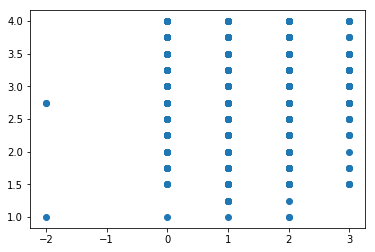

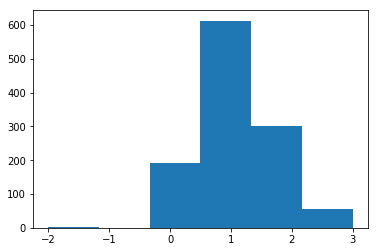

In [35]:
import matplotlib.pyplot as plt
plt.scatter(year9_weekday, GPA)
plt.show()
n, bins, patches = plt.hist(year9_weekday,6)
plt.show()

If we calculate the average GPAs for students in each category(0,1,2,3 hours) we might see the correlation between GPA and study time on weekdays.

In [36]:
# Calculate average GPA for students who don't study on weekdays
zero_hour = year9_weekday.loc[year9_weekday == 0 ]
zero_gpa = GPA.loc[GPA.index.isin(zero_hour.index.values)]
zero_gpa_mean = np.mean(zero_gpa)
# Calculate average GPA for students who study for one hour on weekdays
one_hour = year9_weekday.loc[year9_weekday == 1 ]
one_gpa = GPA.loc[GPA.index.isin(one_hour.index.values)]
one_gpa_mean = np.mean(one_gpa)
# Calculate average GPA for students who study for two hours on weekdays
two_hour = year9_weekday.loc[year9_weekday == 2 ]
two_gpa = GPA.loc[GPA.index.isin(two_hour.index.values)]
two_gpa_mean = np.mean(two_gpa)
# Calculate average GPA for students who study for three hours on weekdays
three_hour = year9_weekday.loc[year9_weekday == 3 ]
three_gpa = GPA.loc[GPA.index.isin(three_hour.index.values)]
three_gpa_mean = np.mean(three_gpa)

We plot the average GPA against the weekday study hours. Unfortunately, it seems there's no strong relationship.'

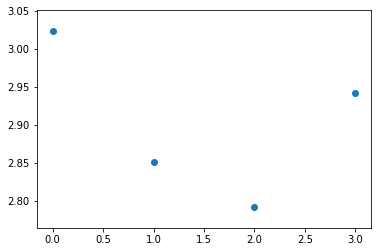

In [37]:
plt.scatter([0,1,2,3], [zero_gpa_mean,one_gpa_mean,two_gpa_mean,three_gpa_mean])
plt.show()

We can do the same thing for the weekend study hours. It's a better indicator of average GPA since the average GPA increases when the study hours increase except studying for three hours. It's still not a good feature to look at. The question would be, is there two feature that have strong correlation in data and the correlation makes sense intuitively?

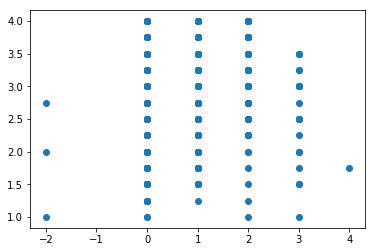

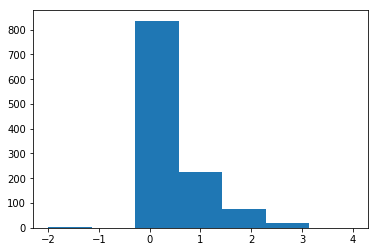

In [38]:
year9_weekend = data_frame.loc[~data_frame['p5i8'].isnull()]
year9_weekend = year9_weekend['p5i8']
Y = outcome.loc[outcome.index.isin(year9_weekend.index.values)]
GPA = Y['gpa']
plt.scatter(year9_weekend, GPA)
plt.show()
n, bins, patches = plt.hist(year9_weekend,7)
plt.show()

In [39]:
# Calculate average GPA for students who don't study on weekends
zero_hour = year9_weekend.loc[year9_weekend == 0 ]
zero_gpa = GPA.loc[GPA.index.isin(zero_hour.index.values)]
zero_gpa_mean = np.mean(zero_gpa)
# Calculate average GPA for students who study for one hour on weekends
one_hour = year9_weekend.loc[year9_weekend == 1 ]
one_gpa = GPA.loc[GPA.index.isin(one_hour.index.values)]
one_gpa_mean = np.mean(one_gpa)
# Calculate average GPA for students who study for two hours on weekends
two_hour = year9_weekend.loc[year9_weekend == 2 ]
two_gpa = GPA.loc[GPA.index.isin(two_hour.index.values)]
two_gpa_mean = np.mean(two_gpa)
# Calculate average GPA for students who study for three hours on weekends
three_hour = year9_weekend.loc[year9_weekend == 3 ]
three_gpa = GPA.loc[GPA.index.isin(three_hour.index.values)]
three_gpa_mean = np.mean(three_gpa)

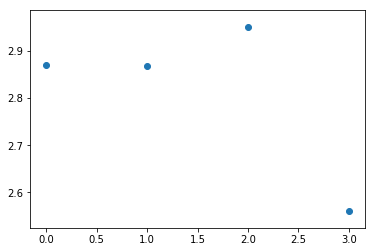

In [40]:
plt.scatter([0,1,2,3], [zero_gpa_mean,one_gpa_mean,two_gpa_mean,three_gpa_mean])
plt.show()

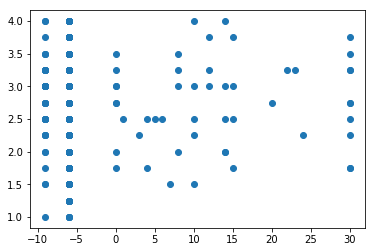

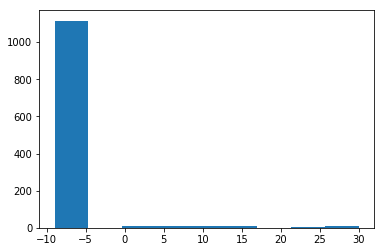

In [42]:
days_seen_month = data_frame.loc[~data_frame['m5a3e'].isnull()]
days_seen_month = days_seen_month['m5a3e']
Y = outcome.loc[outcome.index.isin(days_seen_month.index.values)]
GPA = Y['gpa']
plt.scatter(days_seen_month, GPA)
plt.show()
n, bins, patches = plt.hist(days_seen_month,9)
plt.show()